In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import Data

NOTE: Because the data set is too large, it will take too much time to filter data directly in jupyter. Therefore, this step of selecting California data is carried out in EXCEL, and a csv file is generated.

In [2]:
#Import CA data
US_Accidents_Dec20_CA = pd.read_csv("US_Accidents_Dec20_CA.csv")
US_Accidents_Dec20_CA.head(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,MapQuest,201,3,2016/6/21 10:34,2016/6/21 11:04,38.085300,-122.233017,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,MapQuest,201,3,2016/6/21 10:30,2016/6/21 11:16,37.631813,-122.084167,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,MapQuest,201,2,2016/6/21 10:49,2016/6/21 11:19,37.896564,-122.070717,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,MapQuest,201,3,2016/6/21 10:41,2016/6/21 11:11,37.334255,-122.032471,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,MapQuest,201,2,2016/6/21 10:16,2016/6/21 11:04,37.250729,-121.910713,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-734,MapQuest,201,3,2016/6/21 10:31,2016/6/21 11:16,37.701584,-121.906929,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-735,MapQuest,201,3,2016/6/21 10:17,2016/6/21 11:03,37.328312,-121.871811,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-736,MapQuest,201,3,2016/6/21 10:51,2016/6/21 11:21,37.719162,-122.448273,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-737,MapQuest,201,2,2016/6/21 10:56,2016/6/21 11:26,37.868114,-122.195930,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-738,MapQuest,201,3,2016/6/21 10:57,2016/6/21 11:27,37.700951,-121.801750,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
#Ckeck the data if only contain CA
US_Accidents_Dec20_CA["State"].unique()

array(['CA'], dtype=object)

In [4]:
US_Accidents_Dec20_CA.shape

(260386, 49)

In [5]:
#Total variable information
US_Accidents_Dec20_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260386 entries, 0 to 260385
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     260386 non-null  object 
 1   Source                 260386 non-null  object 
 2   TMC                    260386 non-null  int64  
 3   Severity               260386 non-null  int64  
 4   Start_Time             260386 non-null  object 
 5   End_Time               260386 non-null  object 
 6   Start_Lat              260386 non-null  float64
 7   Start_Lng              260386 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           260386 non-null  float64
 11  Description            260385 non-null  object 
 12  Number                 61915 non-null   float64
 13  Street                 260386 non-null  object 
 14  Side                   260386 non-nu

In [6]:
#The first row of data set content
US_Accidents_Dec20_CA.iloc[0,:]

ID                                                                   A-729
Source                                                            MapQuest
TMC                                                                    201
Severity                                                                 3
Start_Time                                                 2016/6/21 10:34
End_Time                                                   2016/6/21 11:04
Start_Lat                                                          38.0853
Start_Lng                                                         -122.233
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                             0
Description              Right hand shoulder blocked due to accident on...
Number                                                                 NaN
Street                   

# 2. Data Cleaning

## (i) Drop Unnecessary varaibles

In [7]:
#Drop the variables which our group thinks that are not necessary
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['ID', 'Description', 'Street', 
                                                    'Zipcode', 'Country','Weather_Timestamp',
                                                    'TMC','Number','Street',
                                                    'Timezone','Civil_Twilight',
                                                    'Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [8]:
# drop variables with only one level
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['State', 'Source', 'Turning_Loop'], axis=1)

## (ii). Creating features

(a). Set up a time duration

In [9]:
#Current features
US_Accidents_Dec20_CA.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Side', 'City', 'County',
       'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

In [10]:
## extrac year, month day, hour, weekday, and time to clear accidenct
US_Accidents_Dec20_CA["Start_Time"] = pd.to_datetime(US_Accidents_Dec20_CA["Start_Time"],errors="coerce")
US_Accidents_Dec20_CA["End_Time"] = pd.to_datetime(US_Accidents_Dec20_CA["End_Time"],errors="coerce")

## extract year, month day, hour 
US_Accidents_Dec20_CA["Year"] = US_Accidents_Dec20_CA["Start_Time"].dt.year
US_Accidents_Dec20_CA['Month']=US_Accidents_Dec20_CA['Start_Time'].dt.strftime('%b')
US_Accidents_Dec20_CA['Day']=US_Accidents_Dec20_CA['Start_Time'].dt.day
US_Accidents_Dec20_CA['Hour']=US_Accidents_Dec20_CA['Start_Time'].dt.hour
US_Accidents_Dec20_CA['Weekday']=US_Accidents_Dec20_CA['Start_Time'].dt.strftime('%a')

td = "Time_Duration(min)"
US_Accidents_Dec20_CA[td] = round((US_Accidents_Dec20_CA["End_Time"]-US_Accidents_Dec20_CA["Start_Time"])/np.timedelta64(1,"m"))
US_Accidents_Dec20_CA[td]

0         30.0
1         46.0
2         30.0
3         30.0
4         48.0
          ... 
260381    48.0
260382    28.0
260383    30.0
260384    47.0
260385    30.0
Name: Time_Duration(min), Length: 260386, dtype: float64

In [11]:
# Drop start time and end time because we don't need it
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['Start_Time', 'End_Time'], axis=1)

## (iii) Drop Missing Value

In [12]:
## missing values count
s_nacount = np.sum(US_Accidents_Dec20_CA.isna())
s_nacount

Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat               260386
End_Lng               260386
Distance(mi)               0
Side                       0
City                       2
County                     0
Airport_Code              62
Temperature(F)          5817
Wind_Chill(F)         172267
Humidity(%)             6340
Pressure(in)            4719
Visibility(mi)          5592
Wind_Direction          4772
Wind_Speed(mph)        43658
Precipitation(in)     172281
Weather_Condition       5173
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Sunrise_Sunset             2
Year                       0
Month                      0
Day           

In [13]:
# Proportion of missing value
US_Accidents_Dec20_CA.isnull().sum()/US_Accidents_Dec20_CA.shape[0]*100

Severity                0.000000
Start_Lat               0.000000
Start_Lng               0.000000
End_Lat               100.000000
End_Lng               100.000000
Distance(mi)            0.000000
Side                    0.000000
City                    0.000768
County                  0.000000
Airport_Code            0.023811
Temperature(F)          2.233991
Wind_Chill(F)          66.158319
Humidity(%)             2.434847
Pressure(in)            1.812309
Visibility(mi)          2.147581
Wind_Direction          1.832664
Wind_Speed(mph)        16.766646
Precipitation(in)      66.163695
Weather_Condition       1.986666
Amenity                 0.000000
Bump                    0.000000
Crossing                0.000000
Give_Way                0.000000
Junction                0.000000
No_Exit                 0.000000
Railway                 0.000000
Roundabout              0.000000
Station                 0.000000
Stop                    0.000000
Traffic_Calming         0.000000
Traffic_Si

In [14]:
## Dropping variables with >50% missing observations
US_Accidents_Dec20_CA = US_Accidents_Dec20_CA.drop(['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1)

In [15]:
## Dropping missing values
US_Accidents_Dec20_CA.dropna(axis=0,how="any",inplace=True)
print("Total missing values:",np.sum(US_Accidents_Dec20_CA.isna()).sum())
print(US_Accidents_Dec20_CA.shape)

Total missing values: 0
(213707, 34)


In [16]:
#Check if we drop all the missing value
US_Accidents_Dec20_CA.isna().sum()

Severity              0
Start_Lat             0
Start_Lng             0
Distance(mi)          0
Side                  0
City                  0
County                0
Airport_Code          0
Temperature(F)        0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)        0
Wind_Direction        0
Wind_Speed(mph)       0
Weather_Condition     0
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
Sunrise_Sunset        0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
Time_Duration(min)    0
dtype: int64

## (iv) Drop duplicated Entries

In [17]:
## Check Duplicated entries
num_duplicated = np.sum(US_Accidents_Dec20_CA.duplicated())
print(num_duplicated)

432


In [18]:
## Drop Duplicate entries
US_Accidents_Dec20_CA.drop_duplicates(inplace=True)

In [19]:
# Check Duplicated entries again
num_duplicated = np.sum(US_Accidents_Dec20_CA.duplicated())
print(num_duplicated)

0


## (v) Simplify categorical variables with too many levels

1. Simplify wind direction
2. Simplify weather condition

In [20]:
# simplify wind direction 
US_Accidents_Dec20_CA['Wind_Direction'].unique()

array(['Variable', 'WSW', 'NNW', 'NNE', 'NE', 'WNW', 'NW', 'West',
       'South', 'SW', 'North', 'SSW', 'SE', 'SSE', 'ESE', 'ENE', 'East',
       'S', 'VAR', 'CALM', 'E', 'W', 'N'], dtype=object)

In [21]:
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='West')|(US_Accidents_Dec20_CA['Wind_Direction']=='WSW')|(US_Accidents_Dec20_CA['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='South')|(US_Accidents_Dec20_CA['Wind_Direction']=='SSW')|(US_Accidents_Dec20_CA['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='North')|(US_Accidents_Dec20_CA['Wind_Direction']=='NNW')|(US_Accidents_Dec20_CA['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
US_Accidents_Dec20_CA.loc[(US_Accidents_Dec20_CA['Wind_Direction']=='East')|(US_Accidents_Dec20_CA['Wind_Direction']=='ESE')|(US_Accidents_Dec20_CA['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", US_Accidents_Dec20_CA['Wind_Direction'].unique())

Wind Direction after simplification:  ['VAR' 'W' 'N' 'NE' 'NW' 'S' 'SW' 'SE' 'E' 'CALM']


In [22]:
# simplify weather condition
US_Accidents_Dec20_CA['Weather_Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy',
       'Scattered Clouds', 'Overcast', 'Light Rain', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Mist', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Fair', 'Cloudy', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Drizzle', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Rain / Windy', 'Heavy Rain / Windy', 'Light Freezing Rain',
       'Thunderstorm', 'Squalls', 'N/A Precipitation', 'Heavy T-Storm',
       'Thunder', 'Cloudy / Windy', 'Partial Fog', 'Haze / Windy',
       'Heavy Snow', 'Light Snow / Windy', 'Smoke / Win

In [23]:
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
US_Accidents_Dec20_CA.loc[US_Accidents_Dec20_CA["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

In [24]:
print("Weather_Condition after simplification: ", US_Accidents_Dec20_CA["Weather_Condition"].unique())

Weather_Condition after simplification:  ['Clear' 'Cloudy' 'Fog' 'Rain' 'Smoke' 'Snow' 'Thunderstorm' 'Sand'
 'Windy' 'Hail' nan]


# 3. EDA

## (1) Look the outliers

In [25]:
## Finding outliers (outlier > mean + 3*std_dev)
stats = US_Accidents_Dec20_CA.describe().transpose()
stats['outlier_max'] = stats['mean'] + 3*stats['std']
stats['outlier_min'] = stats['mean'] - 3*stats['std']
stats.loc[stats['min'] < stats['outlier_min'], 'outlier'] = 1
stats.loc[stats['max'] > stats['outlier_max'], 'outlier'] = 1
stats

,count,mean,std,min,25%,50%,75%,max,outlier_max,outlier_min,outlier
Severity,213275.0,2.400206,0.494020,1.000000,2.000000,2.000000,3.000000,4.000000,3.882267,0.918146,1.0
Start_Lat,213275.0,35.623320,2.064440,32.542587,33.949665,34.216019,37.749832,41.992886,41.816641,29.429999,1.0
Start_Lng,213275.0,-119.600102,1.996001,-124.369232,-121.833443,-118.452553,-117.936512,-114.510925,-113.612098,-125.588106,NaN
Distance(mi),213275.0,0.045946,0.444381,0.000000,0.000000,0.000000,0.010000,51.130000,1.379091,-1.287198,1.0
Temperature(F),213275.0,65.986089,12.656290,7.000000,57.000000,64.900000,73.900000,127.000000,103.954960,28.017219,1.0
Humidity(%),213275.0,58.964764,23.149133,2.000000,42.000000,61.000000,77.000000,100.000000,128.412163,-10.482635,NaN
Pressure(in),213275.0,29.816991,0.498205,3.010000,29.820000,29.920000,30.020000,58.040000,31.311607,28.322375,1.0
Visibility(mi),213275.0,9.202990,2.329285,0.000000,10.000000,10.000000,10.000000,100.000000,16.190844,2.215136,1.0
Wind_Speed(mph),213275.0,7.097722,6.223569,0.000000,3.500000,6.900000,9.200000,822.800000,25.768430,-11.572986,1.0
Year,213275.0,2017.722527,1.747040,2016.000000,2016.000000,2017.000000,2020.000000,2020.000000,2022.963646,2012.481408,NaN


In [26]:
# Capping duration to mean + 3 * sd
# Not capping other weather related vars as these might be meaningful extreme weather days
mean = np.mean(US_Accidents_Dec20_CA[td])
std = np.std(US_Accidents_Dec20_CA[td])
n = 3
outliers = (US_Accidents_Dec20_CA[td]- mean).abs() > std * n 
US_Accidents_Dec20_CA[td][outliers] = np.nan
US_Accidents_Dec20_CA[td].fillna(mean + n * std,inplace=True)

<ipython-input-26-c9e8c6de3ae8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accidents_Dec20_CA[td][outliers] = np.nan


In [27]:
# Capping Distance to mean + 3*sd
mean = np.mean(US_Accidents_Dec20_CA['Distance(mi)'])
std = np.std(US_Accidents_Dec20_CA['Distance(mi)'])
n = 3
outliers = (US_Accidents_Dec20_CA['Distance(mi)']- mean).abs() > std * n
US_Accidents_Dec20_CA['Distance(mi)'][outliers] = np.nan
US_Accidents_Dec20_CA['Distance(mi)'].fillna(mean + n * std,inplace=True)

<ipython-input-27-f59a213cd1a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Accidents_Dec20_CA['Distance(mi)'][outliers] = np.nan


## (2) Severity distribution

In [28]:
US_Accidents_Dec20_CA["Severity"].value_counts()

2    127920
3     84927
4       285
1       143
Name: Severity, dtype: int64

In [29]:
US_Accidents_Dec20_CA["Severity"].value_counts(normalize=True)

2    0.599789
3    0.398204
4    0.001336
1    0.000670
Name: Severity, dtype: float64

In [30]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').mean()

,Time_Duration(min)
Severity,
1,47.321678
2,53.912047
3,48.832673
4,107.406665


In [31]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').min()

,Time_Duration(min)
Severity,
1,29.0
2,11.0
3,20.0
4,28.0


In [32]:
US_Accidents_Dec20_CA[['Severity', 'Time_Duration(min)']].groupby('Severity').max()

,Time_Duration(min)
Severity,
1,150.000000
2,179.366168
3,179.366168
4,179.366168


<AxesSubplot:xlabel='Severity', ylabel='Time_Duration(min)'>

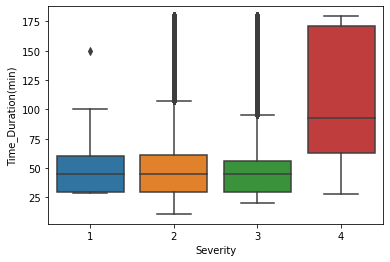

In [33]:
order = US_Accidents_Dec20_CA['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Time_Duration(min)', data = US_Accidents_Dec20_CA, order = order)

In [34]:
#remove outliers' function
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data.loc[(data[variable] > lower) & (data[variable] < upper), :]

<AxesSubplot:xlabel='Severity', ylabel='Time_Duration(min)'>

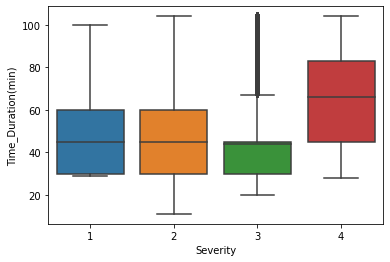

In [35]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
Time_Duration = US_Accidents_Dec20_CA.copy()
Time_Duration = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Time_Duration['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Time_Duration(min)', data = Time_Duration, order = order)

## (3) Distance

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


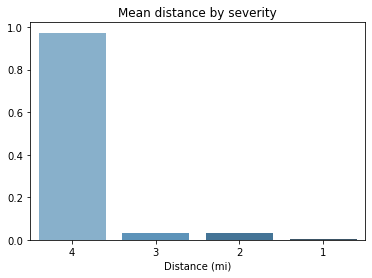

In [36]:
# Comparing with other severity levels, Severity 4 accidents have far more impact on traffic distance.
severity_distance = US_Accidents_Dec20_CA.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)
plt.title("Mean distance by severity")
sns.barplot( severity_distance.index, severity_distance.values, order=severity_distance.index, palette="Blues_d")
plt.xlabel("Distance (mi)")
plt.show()

In [37]:
severity_distance

Severity
4    0.973513
3    0.030922
2    0.030182
1    0.002937
Name: Distance(mi), dtype: float64

## (4) Road Features

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


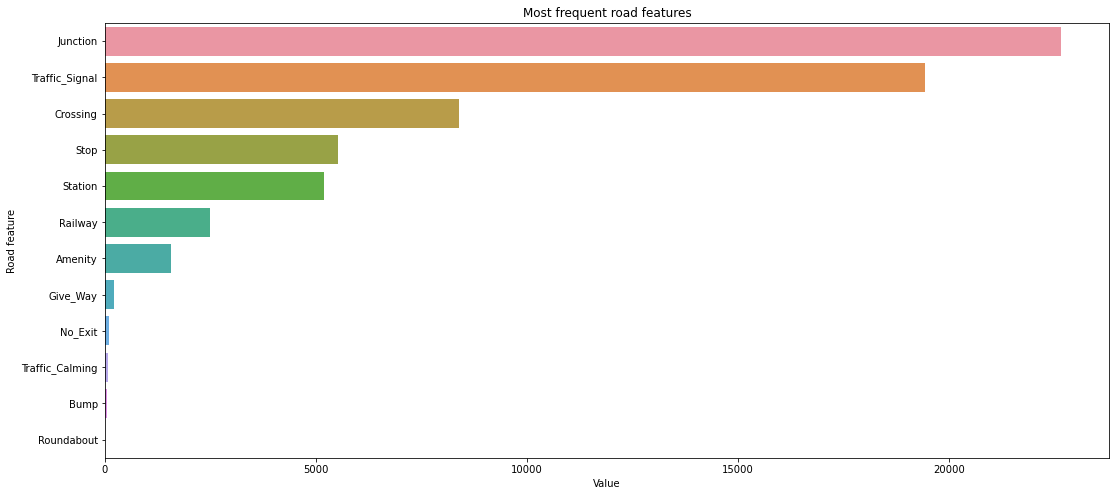

In [38]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]
data_road_features = US_Accidents_Dec20_CA[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data_road_features.values, data_road_features.index);
plt.xlabel("Value");
plt.ylabel("Road feature");
plt.show();

## （5）Weather Features

1. Helper Function
2. Pressure(in)
3. Wind speed
4. Wind direction
5. Humidity
6. Temperature(f)
7. Visibility
8. Weather condition

NOTE: We mostly foucus on the data after remove outliers

In [39]:
#1. Helper Function:

#remove outliers' function
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data.loc[(data[variable] > lower) & (data[variable] < upper), :]

<AxesSubplot:xlabel='Severity', ylabel='Pressure(in)'>

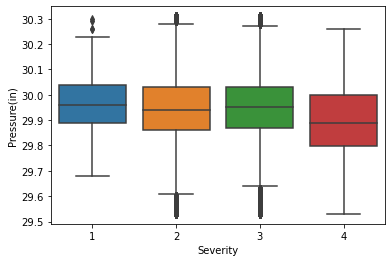

In [40]:
# 2. Pressure

#Pressure after remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Pressure(in)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Pressure(in)'], 0.75)

Pressure = US_Accidents_Dec20_CA.copy()
Pressure = remove_outliers(US_Accidents_Dec20_CA, 'Pressure(in)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Pressure['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Pressure(in)', data = Pressure, order = order)

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

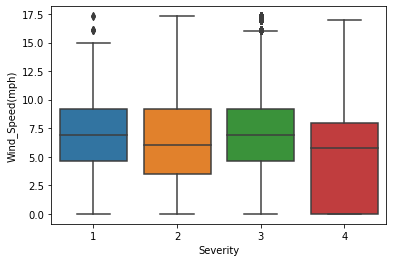

In [41]:
#3. Wind Speed
Q1 = np.quantile(US_Accidents_Dec20_CA['Wind_Speed(mph)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Wind_Speed(mph)'], 0.75)
Wind_Speed = US_Accidents_Dec20_CA.copy()
Wind_Speed = remove_outliers(US_Accidents_Dec20_CA, 'Wind_Speed(mph)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Wind_Speed['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Wind_Speed(mph)', data = Wind_Speed, order = order)

W       61975
S       38678
CALM    25507
N       17620
VAR     16770
E       16461
SW      13900
NW      11628
SE       7708
NE       3028
Name: Wind_Direction, dtype: int64


<AxesSubplot:xlabel='Severity', ylabel='Wind_Direction'>

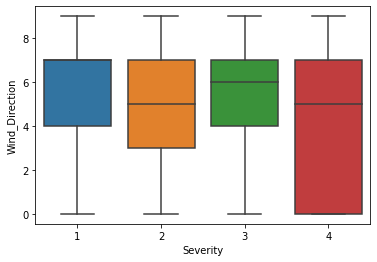

In [42]:
#4. Wind Direction
print(US_Accidents_Dec20_CA['Wind_Direction'].value_counts())

Wind_Direction = US_Accidents_Dec20_CA.copy()

def wind_direction(data):
    data['Wind_Direction'] = data['Wind_Direction'].replace({'CALM': 0, 'N': 1, 'NE':2, 'E': 3, 'SE':4, 'S': 5, 'SW': 6, 'W':7, 'NW':8, 'VAR': 9 })
    return data
    
Wind_Direction = wind_direction(Wind_Direction)

sns.boxplot(x = 'Severity', y='Wind_Direction', data = Wind_Direction)

<AxesSubplot:xlabel='Severity', ylabel='Humidity(%)'>

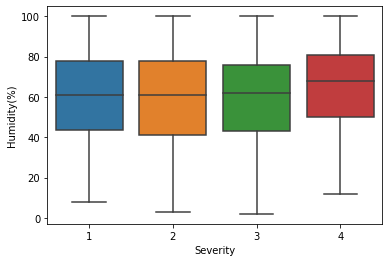

In [43]:
#5. Humidity
Q1 = np.quantile(US_Accidents_Dec20_CA['Humidity(%)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Humidity(%)'], 0.75)
Humidity = US_Accidents_Dec20_CA.copy()
Humidity = remove_outliers(US_Accidents_Dec20_CA, 'Humidity(%)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Humidity['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Humidity(%)', data = Humidity, order = order)

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

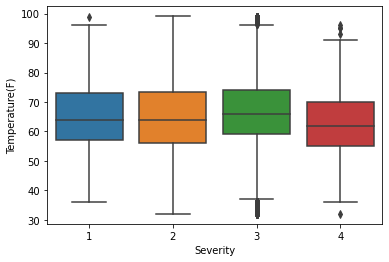

In [44]:
#6. Temperature
Q1 = np.quantile(US_Accidents_Dec20_CA['Temperature(F)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Temperature(F)'], 0.75)
Temperature = US_Accidents_Dec20_CA.copy()
Temperature = remove_outliers(US_Accidents_Dec20_CA, 'Temperature(F)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

order = Temperature['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Temperature(F)', data = Temperature, order = order)

In [45]:
#7. Visibility

#Most data's visibility are 10 miles
US_Accidents_Dec20_CA['Visibility(mi)'].value_counts()

10.00     170714
9.00        7692
7.00        7123
8.00        5978
6.00        4697
5.00        4398
4.00        3253
3.00        2888
2.00        2367
1.00        1161
2.50         672
0.25         525
0.50         309
1.50         245
1.80         239
0.00         229
0.20         144
1.20         119
0.80         119
0.75         113
0.12          53
30.00         46
40.00         45
80.00         32
25.00         32
20.00         22
0.06          12
0.38          10
0.10           8
100.00         7
4.20           5
0.63           5
15.00          4
5.50           3
0.88           2
0.19           1
12.00          1
50.00          1
0.40           1
Name: Visibility(mi), dtype: int64

10.0 10.0


<AxesSubplot:xlabel='Severity', ylabel='Visibility(mi)'>

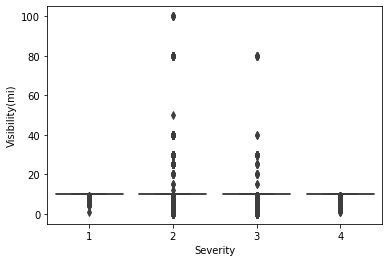

In [46]:
Q1 = np.quantile(US_Accidents_Dec20_CA['Visibility(mi)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Visibility(mi)'], 0.75)
print(Q1, Q3)

Visibility = US_Accidents_Dec20_CA.copy()

order = Visibility['Severity'].value_counts().index.sort_values()
sns.boxplot(x = 'Severity', y='Visibility(mi)', data = Visibility, order = order)

In [47]:
#8. Weather Condition
US_Accidents_Dec20_CA['Weather_Condition'].value_counts()

Clear           118454
Cloudy           73189
Rain             10714
Fog               7847
Smoke             2071
Windy              740
Snow               118
Thunderstorm       113
Sand                27
Hail                 1
Name: Weather_Condition, dtype: int64

In [48]:
#Helper Function
def plot_categorical(Weather_Condition, data, with_filter=True):
    if not with_filter:
        Weather_Condition = data
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Weather_Condition',
        y='Time_Duration(min)',
        data=Weather_Condition.sort_values('Weather_Condition'),
        ax=axs[0],
    )

    sns.countplot(
        x='Weather_Condition',
        data=Weather_Condition.sort_values('Weather_Condition'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Severity'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

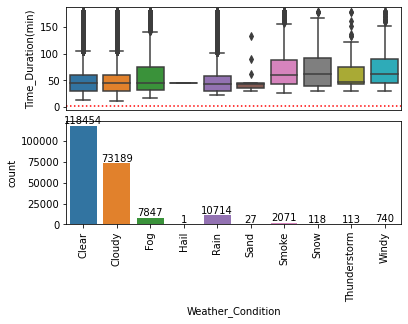

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

top_20 = US_Accidents_Dec20_CA['Weather_Condition'].value_counts().index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['Weather_Condition'].isin(top_20)]

plot_categorical(Weather_Condition=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

## (6) Time Features

1. Number of accidents for each weekday
2. Percentage for accident by the time of day and severity


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


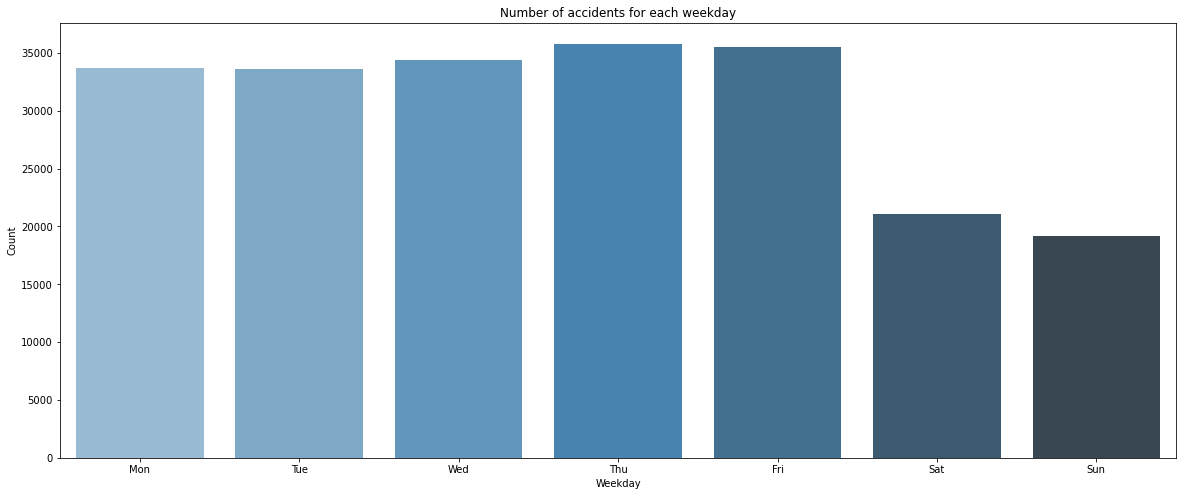

In [50]:
# Number of accidents for weekday

# Accidents are more likely to happen during work days, while in the weekend we have a frequency of about 1/2 less. 
# This may be due to the fact that there are fewer cars on the road during the weekend.
counts = US_Accidents_Dec20_CA['Weekday'].value_counts()
weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(counts.index, counts.values, order=weekdays, palette="Blues_d")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

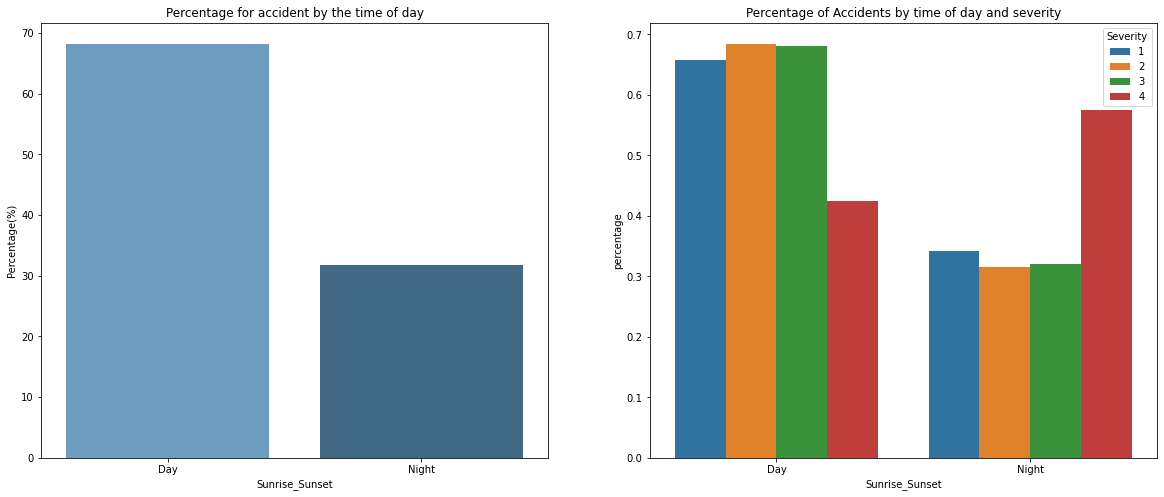

In [51]:
# Percentage for accident by the time of day and severity
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
counts = US_Accidents_Dec20_CA["Sunrise_Sunset"].value_counts()/len(US_Accidents_Dec20_CA["Sunrise_Sunset"])*100
axes[0].set_title("Percentage for accident by the time of day")
sns.barplot(ax = axes[0], x = counts.index, y = counts.values, palette="Blues_d")
axes[0].set_xlabel("Sunrise_Sunset")
axes[0].set_ylabel("Percentage(%)")
data = US_Accidents_Dec20_CA['Sunrise_Sunset'].groupby(US_Accidents_Dec20_CA['Severity']).value_counts(normalize=True).rename('percentage').reset_index()
sns.barplot(ax = axes[1], x='Sunrise_Sunset', y = 'percentage',  hue='Severity', data = data)
axes[1].set_title('Percentage of Accidents by time of day and severity');

## (7) Country (use time duration)

In [52]:
def plot_categorical(County, data, with_filter=True):
    if not with_filter:
        County = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='County',
        y='Time_Duration(min)',
        data=County.sort_values('County'),
        ax=axs[0],
    )

    sns.countplot(
        x='County',
        data=County.sort_values('County'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

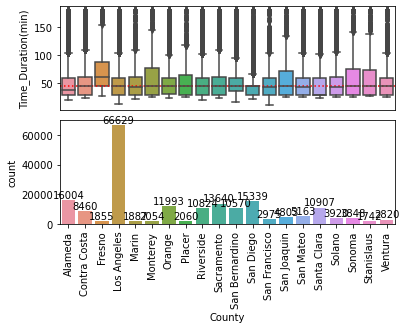

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Before remove outliers
top_20 = US_Accidents_Dec20_CA['County'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['County'].isin(top_20)]
plot_categorical(County=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

<ipython-input-54-f2b48cac17ae>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_20_neighborhoods = County[US_Accidents_Dec20_CA['County'].isin(top_20)]


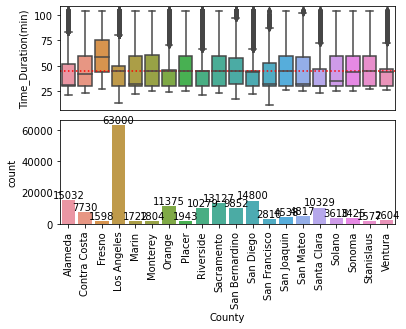

In [54]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
County = US_Accidents_Dec20_CA.copy()
County = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = County['County'].value_counts()[0:20].index
top_20_neighborhoods = County[US_Accidents_Dec20_CA['County'].isin(top_20)]

plot_categorical(County=top_20_neighborhoods, data=County)

## (8) City

In [55]:
US_Accidents_Dec20_CA['City'].value_counts()

Los Angeles       18694
Sacramento         9674
San Diego          7570
San Jose           5840
Oakland            4157
                  ...  
Kensington            1
Crescent Mills        1
Somes Bar             1
Igo                   1
Scotia                1
Name: City, Length: 1023, dtype: int64

In [56]:
#Helper function
def plot_categorical(City, data, with_filter=True):
    if not with_filter:
        City = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='City',
        y='Time_Duration(min)',
        data=City.sort_values('City'),
        ax=axs[0],
    )

    sns.countplot(
        x='City',
        data=City.sort_values('City'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

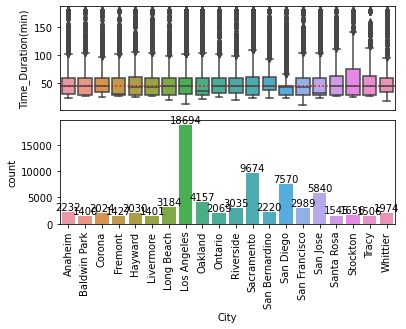

In [57]:
# remove outliers before
top_20 = US_Accidents_Dec20_CA['City'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['City'].isin(top_20)]
plot_categorical(City=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

<ipython-input-58-459925aac3fb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_20_neighborhoods = City[US_Accidents_Dec20_CA['City'].isin(top_20)]


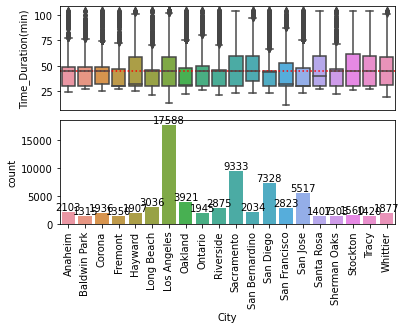

In [58]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
City = US_Accidents_Dec20_CA.copy()
City = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = City['City'].value_counts()[0:20].index
top_20_neighborhoods = City[US_Accidents_Dec20_CA['City'].isin(top_20)]

plot_categorical(City=top_20_neighborhoods, data=City)

## (9) Airport_code

In [59]:
US_Accidents_Dec20_CA['Airport_Code'].value_counts()

KCQT    12098
KEMT     8741
KHHR     8507
KCCR     7932
KOAK     7470
        ...  
KNYL        6
KXVW        5
KNSI        4
KMHS        3
KEDW        1
Name: Airport_Code, Length: 132, dtype: int64

In [60]:
#Helper Function
def plot_categorical(Airport_Code, data, with_filter=True):
    if not with_filter:
        Airport_Code = data
    fig, axs = plt.subplots(nrows=2)
    
    sns.boxplot(
        x='Airport_Code',
        y='Time_Duration(min)',
        data=Airport_Code.sort_values('Airport_Code'),
        ax=axs[0],
    )

    sns.countplot(
        x='Airport_Code',
        data=Airport_Code.sort_values('Airport_Code'),
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['Time_Duration(min)'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.1)

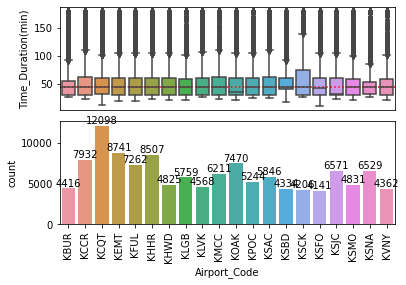

In [61]:
# Before remove outlier
top_20 = US_Accidents_Dec20_CA['Airport_Code'].value_counts()[0:20].index
top_20_neighborhoods = US_Accidents_Dec20_CA[US_Accidents_Dec20_CA['Airport_Code'].isin(top_20)]
plot_categorical(Airport_Code=top_20_neighborhoods, data=US_Accidents_Dec20_CA)

<ipython-input-62-436c6436c70c>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_20_neighborhoods = Airport_Code[US_Accidents_Dec20_CA['Airport_Code'].isin(top_20)]


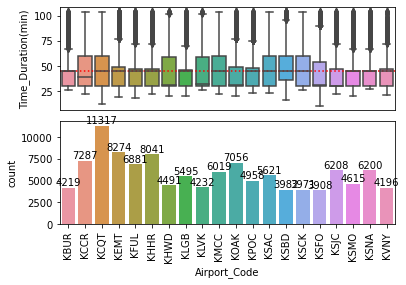

In [62]:
#remove outliers
Q1 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.25)
Q3 = np.quantile(US_Accidents_Dec20_CA['Time_Duration(min)'], 0.75)
Airport_Code = US_Accidents_Dec20_CA.copy()
Airport_Code = remove_outliers(US_Accidents_Dec20_CA, 'Time_Duration(min)', lower=Q1 - 1.5* (Q3 - Q1), upper= Q3 + 1.5*(Q3 - Q1))

top_20 = Airport_Code['Airport_Code'].value_counts()[0:20].index
top_20_neighborhoods = Airport_Code[US_Accidents_Dec20_CA['Airport_Code'].isin(top_20)]

plot_categorical(Airport_Code=top_20_neighborhoods, data=City)

## (10) Side (Left side or Right side)

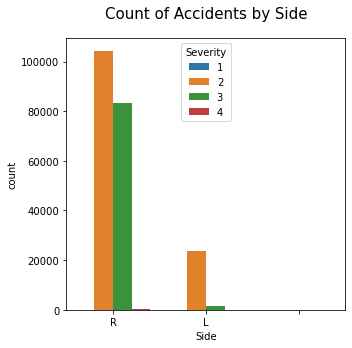

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='Side', hue='Severity', data=US_Accidents_Dec20_CA)
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

## (11) Check correlation between features

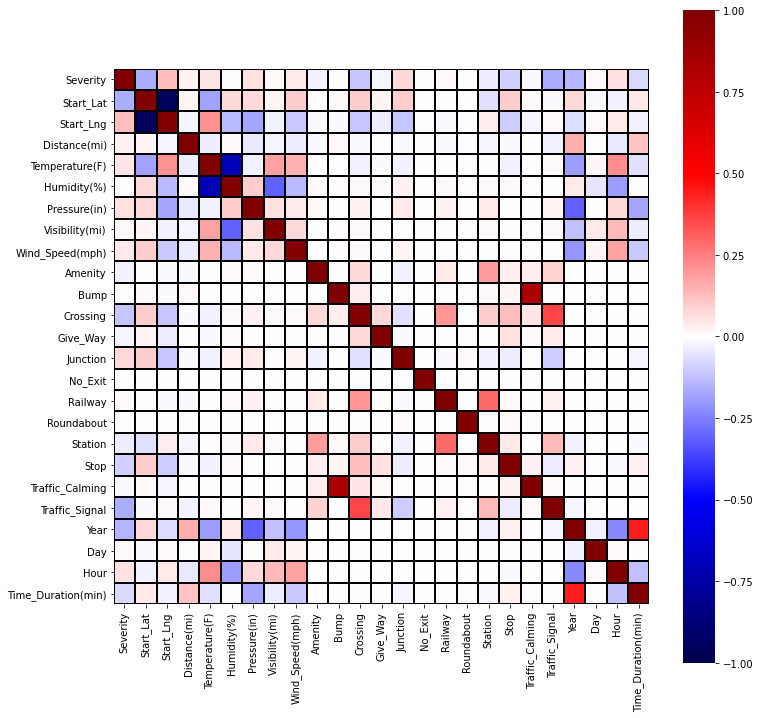

In [64]:
fig=plt.gcf()
fig.set_size_inches(12,12)
fig=sns.heatmap(US_Accidents_Dec20_CA.corr(), cmap="seismic",
                linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,
                cbar_kws={"orientation": "vertical"},cbar=True)

# 4. Feature Engineering

1. Select features after EDA
2. Set up "Severity" to dummy variable
3. Rename features which contains unit on it's name

In [65]:
#1. Select features after EDA
full_data = US_Accidents_Dec20_CA[['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 
                                   'County', 'Pressure(in)',  'Wind_Direction','Weather_Condition',
                                   'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                                   'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month',
                                   'Day', 'Hour', 'Weekday', 'Time_Duration(min)']].copy()

In [66]:
# The first data in the full data set
full_data.iloc[0,:]

Severity                    3
Start_Lat             38.0853
Start_Lng            -122.233
Distance(mi)                0
Side                        R
County                 Solano
Pressure(in)               30
Wind_Direction            VAR
Weather_Condition       Clear
Amenity                 False
Bump                    False
Crossing                False
Give_Way                False
Junction                False
No_Exit                 False
Railway                 False
Roundabout              False
Station                 False
Stop                    False
Traffic_Calming         False
Traffic_Signal          False
Sunrise_Sunset            Day
Year                     2016
Month                     Jun
Day                        21
Hour                       10
Weekday                   Tue
Time_Duration(min)         30
Name: 0, dtype: object

In [67]:
#2. Set up "Severity" to dummy variable 

# If "Severity" large or equal to 3, set "Severity3" equal to 1
# If "Severity" smaller than 3, set "Severity3" equal to 0
severity_dummy = np.array(full_data.loc[:, 'Severity'] >= 3).astype(int)
full_data['Severity3'] = severity_dummy

In [68]:
full_data =full_data.rename(columns = {'Distance(mi)': 'Distance', 'Pressure(in)' : 'Pressure', 'Time_Duration(min)': 'Time_Duration'})
full_data

,Severity,Start_Lat,Start_Lng,Distance,Side,County,Pressure,Wind_Direction,Weather_Condition,Amenity,...,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Weekday,Time_Duration,Severity3
0,3,38.085300,-122.233017,0.0,R,Solano,30.00,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
1,3,37.631813,-122.084167,0.0,R,Alameda,30.06,W,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,46.0,1
2,2,37.896564,-122.070717,0.0,R,Contra Costa,29.97,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,0
3,3,37.334255,-122.032471,0.0,R,Santa Clara,30.04,N,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,30.0,1
4,2,37.250729,-121.910713,0.0,R,Santa Clara,30.06,VAR,Clear,False,...,False,False,Day,2016,Jun,21,10,Tue,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260381,2,34.123230,-118.341896,0.0,R,Los Angeles,29.00,S,Clear,False,...,False,False,Night,2019,Oct,9,19,Wed,48.0,0
260382,3,34.068192,-117.978111,0.0,R,Los Angeles,29.72,SW,Cloudy,False,...,False,False,Night,2019,Oct,9,19,Wed,28.0,1
260383,3,33.928146,-118.239166,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,30.0,1
260384,3,33.930241,-118.280624,0.0,R,Los Angeles,29.77,CALM,Cloudy,False,...,False,False,Night,2019,Oct,9,20,Wed,47.0,1


In [70]:
Full_data = full_data.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='full_data.csv')  
full_data.to_csv('full_data.zip', index=False,
          compression=compression_opts)  

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


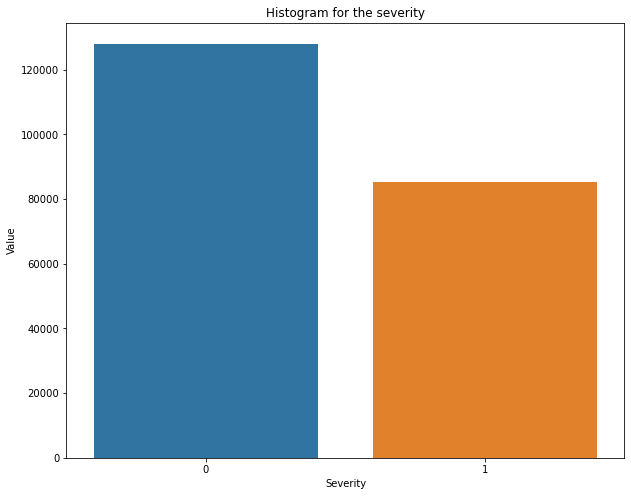

In [71]:
severity_counts = full_data["Severity3"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()